In [100]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
#rcParams['font.family']='serif'
rcParams['font.size']= 16

In [86]:
N = 35
x = numpy.linspace(0,2*numpy.pi,N)
y = numpy.linspace(0,2*numpy.pi,N)
X,Y = numpy.meshgrid(x,y)
dh = 2*numpy.pi/(N-1)
nt = 10
t = numpy.linspace(0,2,nt)
nu=1

Xu,Yu = X,Y+0.5*dh
Xv,Yv = X+0.5*dh,Y

u_i = -numpy.cos(Xu)*numpy.sin(Yu)
v_i = numpy.sin(Xv)*numpy.cos(Yv)
p_i = -(numpy.cos(2*X)+numpy.cos(2*Y))/4

u_e = -numpy.exp(-2*0)*numpy.cos(Xu)*numpy.sin(Yu)
v_e = numpy.exp(-2*0)*numpy.sin(Xv)*numpy.cos(Yv)

#u_i[0,:] = u_e[0,:]

In [87]:
CFL = 0.3 # 0.4 or 0.3 or 2.51
sigma = 0.62
maxu,maxv = numpy.max(numpy.absolute(u_e)/dh), numpy.max(numpy.absolute(v_e)/dh)
maxim = max(maxu,maxv)

dtc = CFL/maxim
dtv = sigma/nu*dh**2   #stability condition

dt = min(dtc,dtv)

In [71]:
def divcheck(u,v,dh,N):
    divergence = numpy.zeros((N,N))
    divergence = (u[1:-1,2:]-u[1:-1,1:-1]+v[2:,1:-1]-v[1:-1,1:-1])/dh
    return divergence

In [72]:
divergence = divcheck(u_i,v_i,dh,N)
numpy.min(divergence),numpy.max(divergence)

(-6.9265413062983259e-15, 6.7642004944319591e-15)

In [73]:
def convective_flux_x(u,v,dh):
    #divergence of convective flux in x-dir 
    
    F_cx = -1/(4*dh)*( (u[1:-1,1:-1]+u[1:-1,2:])**2 - (u[1:-1,1:-1]+u[1:-1,:-2])**2 +\
        (u[1:-1,1:-1]+u[2:,1:-1])*(v[1:-1,2:]+v[1:-1,1:-1]) - (u[1:-1,1:-1]+u[:-2,1:-1])*(v[:-2,2:]+v[:-2,1:-1]) )
    return F_cx

def pressure_flux_x(p,dh):
    #divergence of pressure flux in x-dir

    F_px = -(p[1:-1,2:]-p[1:-1,1:-1])/dh
    return F_px

def viscous_flux_x(u,v,nu,dh):
    # divergence of viscous flux in x-dir
    
    F_vx = nu/dh**2*( u[1:-1,2:] -4*u[1:-1,1:-1] + u[1:-1,:-2] + u[2:,1:-1] + u[:-2,1:-1] )
    return F_vx

def convective_flux_y(u,v,dh):   #####CHECK THIS#####
    F_cy = -1/(4*dh)*( (v[1:-1,1:-1]+v[2:,1:-1])**2 - (v[1:-1,1:-1]+v[:-2,1:-1])**2 +\
        (v[1:-1,1:-1]+v[1:-1,2:])*(u[2:,1:-1]+u[1:-1,1:-1]) - (v[1:-1,1:-1]+v[1:-1,:-2])*(u[2:,:-2]+u[1:-1,:-2]) )
    return F_cy

def pressure_flux_y(p,dh):
    F_py = -(p[2:,1:-1]-p[1:-1,1:-1])/dh
    return F_py

def viscous_flux_y(u,v,nu,dh):   #####CHECK THIS#####
    F_vy = nu/dh**2*( v[1:-1,2:] - 4*v[1:-1,1:-1] + v[1:-1,:-2] + v[2:,1:-1] + v[:-2,1:-1] )
    return F_vy

In [74]:
F_cx,F_vx = convective_flux_x(u_i,v_i,dh), viscous_flux_x(u_i,v_i,1,dh)
F_cy,F_vy = convective_flux_y(u_i,v_i,dh), viscous_flux_y(u_i,v_i,1,dh)

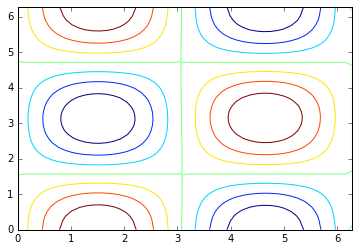

In [85]:
ustar = numpy.zeros_like(u_i)
ustar[1:-1,1:-1] = u_i[1:-1,1:-1] + dt*(F_cx+F_vx)
ustar[0,:] = 0
ustar[-1,:] = 0
ustar[:,-1] = u_e[:,-1]
ustar[:,0] = u_e[:,0]

vstar = numpy.zeros_like(u_i)
vstar[1:-1,1:-1] = v_i[1:-1,1:-1] + dt*(F_cy+F_vy)
vstar[0,:] = v_e[0,:]
vstar[-1,:] = v_e[-1,:]
pyplot.contour(X,Y,vstar)

In [76]:
divergence = divcheck(ustar,vstar,dh,N)
numpy.min(divergence),numpy.max(divergence)
#pyplot.contour(X[1:-1,1:-1],Y[1:-1,1:-1],divergence)

(-0.14852555700350792, 0.16904193854018287)

In [88]:
Xu,Yu = X,Y+0.5*dh
Xv,Yv = X+0.5*dh,Y
Xpl = numpy.ones((N+1,N+1))
Ypl = numpy.ones((N+1,N+1))
Xpl[1:,1:] = X+0.5*dh
Xpl[:,0] = -0.5*dh
Xpl[0,:] = Xpl[1,:]
Ypl[1:, 1:] = Y+0.5*dh
Ypl[0,:] = -0.5*dh
Ypl[:,0]=Ypl[:,1]

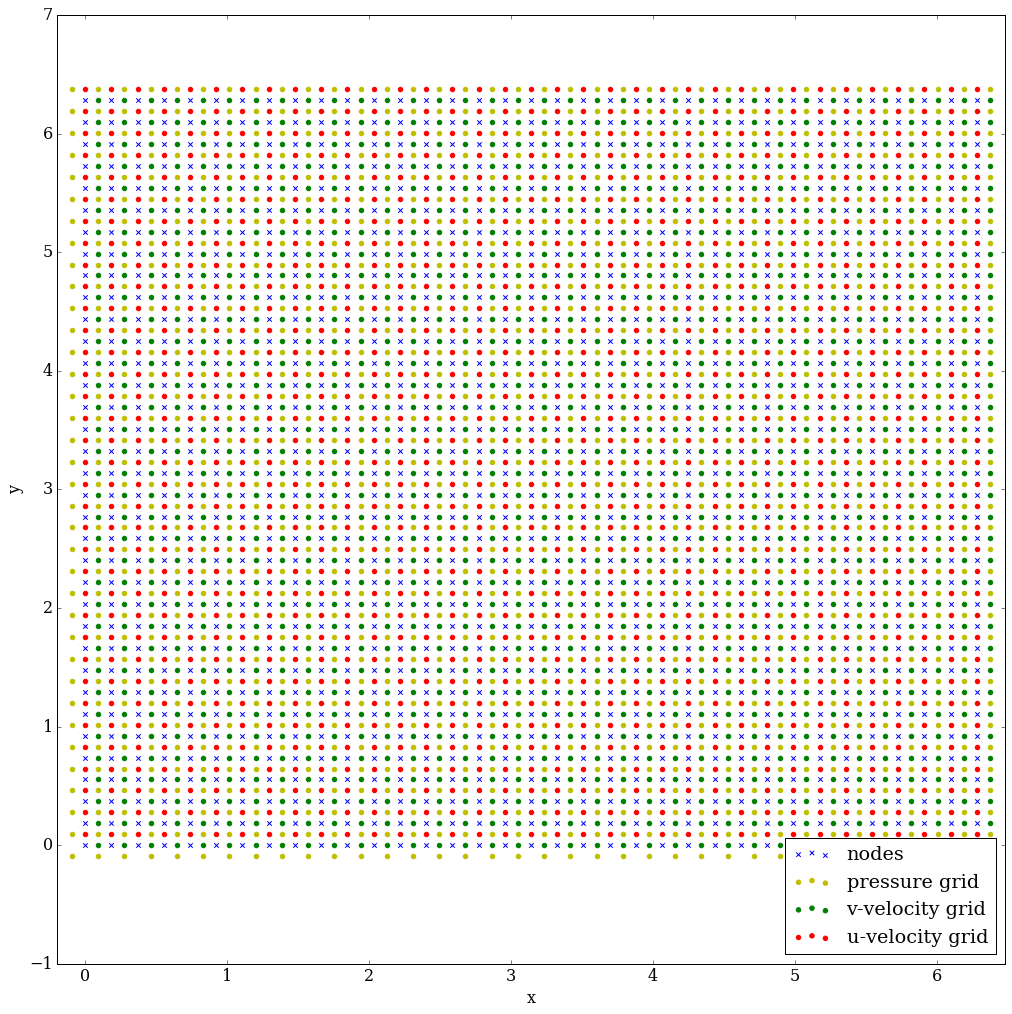

In [101]:
pyplot.figure(figsize=(17,17))
#pyplot.xlim(0,2*numpy.pi)
#pyplot.ylim(0,2*numpy.pi)
pyplot.scatter(X,Y,label='nodes',marker='x')
pyplot.xlim(-0.2,2*numpy.pi+0.2)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.scatter(Xpl,Ypl,color='y',label='pressure grid')

pyplot.scatter(Xv,Yv,color='g',label='v-velocity grid')
pyplot.scatter(Xu,Yu,color='r',label='u-velocity grid')
pyplot.legend(loc=4);

In [79]:
def ic(Xu,Yu,Xv,Yv,Xpl,Ypl):
    
    # at t=0, initial guess
    u_i = -numpy.cos(Xu)*numpy.sin(Yu)
    v_i = numpy.sin(Xv)*numpy.cos(Yv)
    p_i = -1/4*(numpy.cos(2*Xpl)+numpy.cos(2*Ypl))
     
    #u_e = -numpy.exp(-2*t)*numpy.cos(Xu)*numpy.sin(Yu)
    #v_e = numpy.exp(-2*t)*numpy.sin(Xv)*numpy.cos(Yv)
    
    #u_i[:,0] = #u_i[:,1]
    #u_i[:,-1] = #u_i[:,-2]
    #u_i[0,:] = -u_i[1,:]
    u_i[-1,:] = -u_i[-2,:]
    
    #v_i[0,:] = #v_e[0,:]
    #v_i[-1,:] = #v_e[-1,:]
    #v_i[:,0] = -v_i[:,1]
    v_i[:,-1] = -v_i[:,-2]
    
    p_i[0,:] = p_i[1,:]
    p_i[-1,:] = p_i[-2,:]
    p_i[:,0] = p_i[:,1]
    p_i[:,-1] = p_i[:,-2]
    
    return u_i,v_i,p_i

In [ ]:
ustar[:,0] = u_e[:,0]
ustar[:,-1] = u_e[:,-1]
ustar[0,:] = u_e[0,:] #ustar[:,1]
ustar[-1,:] = -ustar[-2,:] #u_e[:,-1]
vstar[0,:] = v_e[0,:]
vstar[-1,:] = v_e[-1,:]
vstar[:,0] = v_e[:,0] #vstar[1,:]
vstar[:,-1] = -vstar[:,-2] #v_e[:,-1]


u_n[i,:,0] = u_e[:,0]
u_n[i,0,:] =  u_e[0,:] 
u_n[i,:,-1] = 0#u_e[:,-1]
u_n[i,-1,:] = -u_n[i,-2,:]
v_n[i,:,0] = v_e[:,0]
v_n[i,0,:] = v_e[0,:] 
v_n[i,:,-1] = v_e[:,-1]
v_n[i,-1,:] = -v_n[i,-2,:]

In [ ]:
def euler_method(u,v,p,dh,dt,nt,nu,Xu,Yu,Xv,Yv):   #####ADD BCs#####
    
    u_n = numpy.zeros((nt,len(u),len(u)))
    v_n = numpy.zeros((nt,len(v),len(v)))
    p_n = numpy.zeros((nt,len(p),len(p)))
   
    u_n[:,:,:] = u.copy()    #hold u-comp vel for each timestep
    v_n[:,:,:] = v.copy()    #hold v-comp vel for each timestep
    p_n[:,:,:] = p.copy()    #hold pressure for each timestep
    
    u_e = numpy.zeros((nt,len(u),len(u)))
    v_e = numpy.zeros((nt,len(u),len(u)))
    t=numpy.linspace(0,2,nt)
    for i in range(1,nt):
        #u_i = -numpy.exp(-2*(t-1))*numpy.cos(Xu)*numpy.sin(Yu)
        #v_i = numpy.exp(-2*(t-1))*numpy.sin(Xv)*numpy.cos(Yv)
        #p_i = -numpy.exp(-4*(t-1))/4*(numpy.cos(2*Xpl)+numpy.cos(2*Ypl))
        
        un=u.copy()
        vn=v.copy()
        pn=p.copy()
        
        u_e[i,:,:] = -numpy.exp(-2*t[i])*numpy.cos(Xu)*numpy.sin(Yu)
        v_e[i,:,:] = numpy.exp(-2*t[i])*numpy.sin(Xv)*numpy.cos(Yv) 
        
        ustar = numpy.zeros_like(u)
        vstar = numpy.zeros_like(u)
        
        #velocity prediction
        F_cx = convective_flux_x(u,v,dh)
        F_vx = viscous_flux_x(u,v,nu,dh)
        ustar[1:-1,1:-1] = un[1:-1,1:-1] + dt*(F_cx+F_vx)
        
        F_cy = convective_flux_y(u,v,dh)
        F_vy = viscous_flux_y(u,v,nu,dh)
        vstar[1:-1,1:-1] = vn[1:-1,1:-1] + dt*(F_cy+F_vy)
        
        divergence = divcheck(ustar,vstar,dh,N)
        
        # normal component boundary conditions
        ustar[:,0] = u_e[i,:,0]#ustar[:,1]
        ustar[:,-1] = u_e[i,:,-1]#ustar[:,-2]
        
        ustar[0,:] = u_e[i,0,:] #ustar[:,1]
        ustar[-1,:] = u_e[i,-1,:] #ustar[-2,:]
        
        vstar[0,:] = v_e[i,0,:]#vstar[1,:]
        vstar[-1,:] = v_e[i,-1,:]#vstar[-2,:]
        
        vstar[:,0] = v_e[i,:,0] #vstar[1,:]
        vstar[:,-1] = v_e[i,:,-1] #vstar[:,-2]
        
        #poisson to solve for pressure
        f,l2_target,omega = poisson_IG(N,dt,ustar,vstar)
        p_n[i,:,:],iterations,l2_diff = poisson_SOR(pn.copy(),pn.copy(),l2_target,omega,f,dh)
        
       
        
        #velocity correction
        F_px = pressure_flux_x(p_n[i,:,:],dh)
        u_n[i,1:-1,1:-1] = ustar[1:-1,1:-1] + dt*F_px[1:,1:]
        F_py = pressure_flux_y(p_n[i,:,:],dh)
        v_n[i,1:-1,1:-1] = vstar[1:-1,1:-1] + dt*F_py[1:,1:]
        
        #BC for all components
        u_n[i,:,0] = u_n[i,:,1]#u_e[i,:,0]
        u_n[i,:,-1] = u_n[i,:,-2]#u_e[i,:,-1]
        
        u_n[i,0,:] =  u_e[i,0,:] #u_n[i,1,:]
        u_n[i,-1,:] = u_e[i,-1,:]#u_n[i,-2,:]
        
        v_n[i,0,:] =  v_n[i,1,:]#v_e[i,0,:]
        v_n[i,-1,:] = v_n[i,-2,:]#v_e[i,-1,:]
        
        v_n[i,:,0] = v_e[i,:,0]
        v_n[i,:,-1] = v_e[i,:,-1]
      
        
        #move to u and v
        u = u_n[i].copy()
        v = v_n[i].copy()
        p = p_n[i].copy()
        
        print('end')
        
    return u_n,v_n,p_n,l2_target,iterations,l2_diff,divergence,u_e,v_e